In [134]:
#loading the required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE
from sklearn.metrics import PredictionErrorDisplay

In [135]:
# Load the commodity price data
commodity_data = pd.read_csv('SoybeanFutures_ZS_CBT.csv')
commodity_price_data = commodity_data[['Date', 'Close']]
commodity_price_data = commodity_price_data.tail(90)
commodity_price_data
commodity_price_data_np = commodity_price_data["Close"].to_numpy()
commodity_price_data_np

array([1560.75, 1552.5 , 1605.25, 1534.75, 1513.  , 1507.5 , 1472.75,
       1510.5 , 1490.  , 1466.75, 1470.5 , 1489.25, 1549.75, 1534.25,
       1503.75, 1451.5 , 1448.5 , 1461.25, 1478.75, 1461.25, 1457.  ,
       1425.75, 1411.25, 1408.  , 1408.75, 1410.75, 1364.75, 1374.  ,
       1383.5 , 1369.75, 1358.  , 1367.  , 1374.  , 1376.25, 1396.  ,
       1395.75, 1383.75, 1385.25, 1372.  , 1372.5 , 1391.5 , 1395.5 ,
       1372.  , 1382.  , 1381.75, 1382.25, 1387.75, 1407.  , 1435.75,
       1440.  , 1426.75, 1451.5 , 1440.  , 1444.  , 1459.75, 1430.5 ,
       1455.5 , 1441.75, 1457.25, 1429.25, 1417.  , 1428.25, 1436.75,
       1429.75, 1436.  , 1436.25, 1457.25, 1459.5 , 1469.5 , 1429.75,
       1438.5 , 1437.75, 1455.  , 1472.  , 1486.25, 1483.75, 1460.5 ,
       1479.75, 1482.25, 1473.5 , 1480.  , 1460.75, 1478.5 , 1481.  ,
       1467.75, 1479.  , 1482.25, 1506.5 , 1508.75, 1519.25])

In [136]:
# Load the arima_all predicted price data
arima_soybean_all = pd.read_csv("pred_soybean_all.csv")
arima_soybean_all
arima_soybean_all_np = arima_soybean_all["Predictions_ALL"].to_numpy()
arima_soybean_all_np

array([1568.66774886, 1560.9107561 , 1545.33985476, 1528.4508686 ,
       1515.72347928, 1508.23397497, 1510.86783   , 1521.29295765,
       1536.38879745, 1548.25663553, 1552.68613558, 1549.96073328,
       1542.8189101 , 1527.20150246, 1512.86857951, 1502.48404218,
       1500.09556264, 1509.88285607, 1521.92438727, 1535.48333272,
       1543.92770107, 1545.52833046, 1540.28504934, 1530.18078565,
       1518.58168891, 1507.41850389, 1501.33339627, 1501.55921788,
       1507.08165945, 1516.02390092, 1526.82996611, 1532.33281581,
       1531.8705714 , 1524.64236682, 1517.67708468, 1508.79775521,
       1502.7706553 , 1502.09622051, 1505.71540237, 1512.65400499,
       1520.56137915, 1525.53639313, 1526.18259418, 1525.39624991,
       1526.07648825, 1518.6224888 , 1511.85963271, 1510.49642624,
       1509.86409871, 1510.70477975, 1513.06532878, 1520.19970468,
       1523.63765393, 1520.85003846, 1518.21466934, 1516.1646543 ,
       1512.16228724, 1509.05855975, 1509.70392947, 1512.06451

In [137]:
# Load the arima_minnesota predicted price data
arima_soybean_minnesota = pd.read_csv("pred_soybean_minnesota.csv")
arima_soybean_minnesota
arima_soybean_minnesota_np = arima_soybean_minnesota["Predictions_MIN"].to_numpy()
arima_soybean_minnesota_np

array([1570.01474345, 1562.05274689, 1545.70438547, 1526.27626239,
       1509.92122333, 1501.97237667, 1504.31062162, 1514.94737514,
       1530.2819804 , 1543.75019416, 1549.74569686, 1547.50861609,
       1536.82892506, 1521.12346063, 1505.57994133, 1494.98171107,
       1494.05111371, 1500.73684269, 1512.32103808, 1525.02406114,
       1534.67266022, 1537.00445138, 1531.02397764, 1519.77478957,
       1507.10496107, 1496.41143418, 1491.58280181, 1493.86406955,
       1502.28989175, 1513.4583066 , 1523.2903353 , 1528.92714654,
       1527.33444284, 1518.50260919, 1507.19168226, 1497.43645611,
       1492.29544878, 1493.16188225, 1500.37803587, 1511.11104623,
       1521.27081977, 1527.46309668, 1527.96730671, 1524.26408508,
       1516.68287936, 1507.90712173, 1500.6641955 , 1498.62352676,
       1501.43542052, 1507.28179755, 1514.85697198, 1522.85643788,
       1527.0780492 , 1526.15393972, 1521.62465295, 1515.8326404 ,
       1510.77152907, 1508.5363427 , 1510.70443808, 1517.10358

In [138]:
# Load the stl lstm predicted price data
stl_lstm_soybean = pd.read_csv("STL LSTM Pred.csv")
stl_lstm_soybean
stl_lstm_soybean_np = stl_lstm_soybean["Close Price"].to_numpy()
stl_lstm_soybean_np

array([1566.75, 1560.75, 1552.5 , 1534.75, 1534.75, 1513.  , 1507.5 ,
       1472.75, 1490.  , 1490.  , 1466.75, 1470.5 , 1549.75, 1549.75,
       1534.25, 1503.75, 1451.5 , 1461.25, 1461.25, 1478.75, 1461.25,
       1457.  , 1411.25, 1411.25, 1408.  , 1408.75, 1410.75, 1374.  ,
       1374.  , 1383.5 , 1369.75, 1358.  , 1374.  , 1374.  , 1376.25,
       1396.  , 1395.75, 1385.25, 1385.25, 1372.  , 1372.5 , 1391.5 ,
       1372.  , 1372.  , 1382.  , 1381.75, 1382.25, 1407.  , 1407.  ,
       1435.75, 1440.  , 1426.75, 1440.  , 1440.  , 1444.  , 1459.75,
       1430.5 , 1441.75, 1441.75, 1457.25, 1429.25, 1417.  , 1436.75,
       1436.75, 1429.75, 1436.25, 1457.25, 1457.25, 1459.5 , 1469.5 ,
       1429.75, 1437.75, 1437.75, 1455.  , 1472.  , 1486.25, 1460.5 ,
       1460.5 , 1479.75, 1482.25, 1473.5 , 1460.75, 1460.75, 1478.5 ,
       1481.  , 1467.75, 1482.25, 1482.25, 1506.5 , 1508.75])

In [139]:
dates = stl_lstm_soybean["Date"]
dates

0     2022-08-24
1     2022-08-25
2     2022-08-26
3     2022-08-29
4     2022-08-30
         ...    
85    2022-12-23
86    2022-12-27
87    2022-12-28
88    2022-12-29
89    2022-12-30
Name: Date, Length: 90, dtype: object

## **Assessing Model Performance for ARIMA models using all available weather data**




In [140]:
#MSE Performance
mse_arima_soybean_all = mean_squared_error(y_true = commodity_price_data_np, y_pred = arima_soybean_all_np)
print("MSE for ARIMA model using all weather data: " + str(mse_arima_soybean_all))

MSE for ARIMA model using all weather data: 8919.650841309169


In [141]:
#RMSE Performance
rmse_arima_soybean_all = mean_squared_error(y_true = commodity_price_data_np, y_pred = arima_soybean_all_np, squared = False)
print("RMSE for ARIMA model using all weather data: " + str(rmse_arima_soybean_all))

RMSE for ARIMA model using all weather data: 94.44390314524897


In [142]:
#MAPE Performance
mape_arima_soybean_all = mean_absolute_percentage_error(y_true = commodity_price_data_np, y_pred = arima_soybean_all_np)
print("MAPE for ARIMA model using all weather data: " + str(mape_arima_soybean_all))

MAPE for ARIMA model using all weather data: 0.0600355787689898


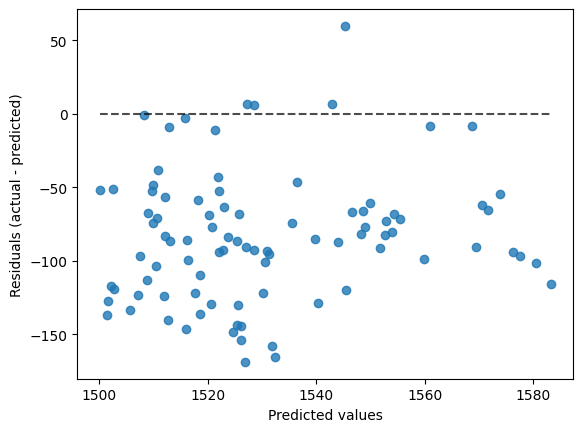

In [143]:
#Plot of Residuals 
display_arima_soybean_all = PredictionErrorDisplay(y_true=commodity_price_data_np, y_pred=arima_soybean_all_np)
display_arima_soybean_all.plot()

## **Assessing Model Performance for ARIMA models using region-specific data**


In [144]:
#MSE Performance
mse_arima_soybean_minnesota = mean_squared_error(y_true = commodity_price_data_np, y_pred = arima_soybean_minnesota_np)
print("MSE for ARIMA model using Minnesota weather data: " + str(mse_arima_soybean_minnesota))

MSE for ARIMA model using Minnesota weather data: 8760.98077176002


In [145]:
#RMSE Performance
rmse_arima_soybean_minnesota = mean_squared_error(y_true = commodity_price_data_np, y_pred = arima_soybean_minnesota_np, squared = False)
print("RMSE for ARIMA model using Minnesota weather data: " + str(rmse_arima_soybean_minnesota))

RMSE for ARIMA model using Minnesota weather data: 93.60011096019075


In [146]:
#MAPE Performance
mape_arima_soybean_minnesota = mean_absolute_percentage_error(y_true = commodity_price_data_np, y_pred = arima_soybean_minnesota_np)
print("MAPE for ARIMA model using Minnesota weather data: " + str(mape_arima_soybean_minnesota))

MAPE for ARIMA model using Minnesota weather data: 0.059662203790206834


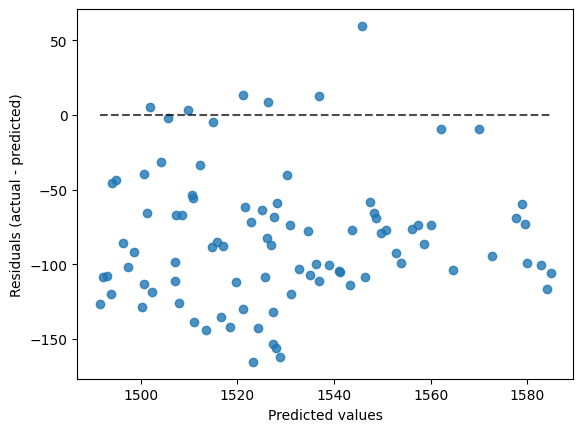

In [147]:
#Plot of Residuals 
display_arima_soybean_minnesota = PredictionErrorDisplay(y_true=commodity_price_data_np, y_pred=arima_soybean_minnesota_np)
display_arima_soybean_minnesota.plot()

## **Assessing Model Performance for the STL LSTM model using all weather data**




In [148]:
#MSE Performance
mse_stl_lstm_soybean = mean_squared_error(y_true = commodity_price_data_np, y_pred = stl_lstm_soybean_np)
print("MSE for the STL LSTM model using all weather data: " + str(mse_stl_lstm_soybean))

MSE for the STL LSTM model using all weather data: 282.7090277777778


In [149]:
#RMSE Performance
rmse_stl_lstm_soybean = mean_squared_error(y_true = commodity_price_data_np, y_pred = stl_lstm_soybean_np, squared = False)
print("RMSE for the STL LSTM model using all weather data: " + str(rmse_stl_lstm_soybean))

RMSE for the STL LSTM model using all weather data: 16.813953365516923


In [150]:
#MAPE Performance
mape_stl_lstm_soybean = mean_absolute_percentage_error(y_true = commodity_price_data_np, y_pred = stl_lstm_soybean_np)
print("MAPE for the STL LSTM model using all weather data: " + str(mape_stl_lstm_soybean))

MAPE for the STL LSTM model using all weather data: 0.007811112831665667


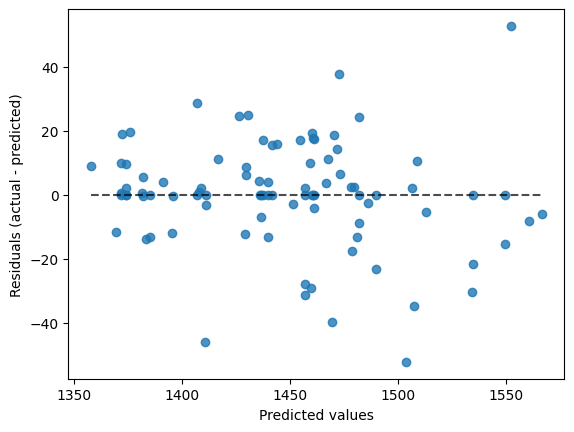

In [151]:
#Plot of Residuals 
display_stl_lstm_soybean = PredictionErrorDisplay(y_true=commodity_price_data_np, y_pred=stl_lstm_soybean_np)
display_stl_lstm_soybean.plot()

## **Plot of Predicted Values for different models**


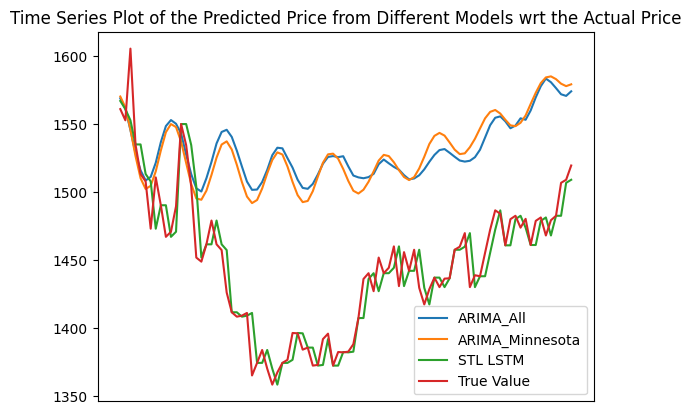

In [157]:
import matplotlib.pyplot as plt
plt.plot(dates, arima_soybean_all["Predictions_ALL"], label="ARIMA_All")
plt.plot(dates, arima_soybean_minnesota["Predictions_MIN"], label="ARIMA_Minnesota")
plt.plot(dates, stl_lstm_soybean["Close Price"], label="STL LSTM")
plt.plot(dates, commodity_price_data["Close"], label="True Value")
plt.gca().get_xaxis().set_visible(False)
plt.legend()
plt.title("Time Series Plot of the Predicted Price from Different Models wrt the Actual Price")
plt.show()


## **Assessing Model Performance using Diebold-Mariano Test**


In [153]:
#!pip install dieboldmariano
from dieboldmariano import dm_test
#dm_test(T, F, G, one_sided=True)

In [154]:
#ARIMA_All vs ARIMA_Minnesota
dm_arima_v_arima = dm_test(commodity_price_data_np, arima_soybean_all_np, arima_soybean_minnesota_np, one_sided=True)
print("ARIMA_All vs ARIMA_Minnesota - Diebold-Mariano realized test statistic value: " + str(dm_arima_v_arima[0]))
print("ARIMA_All vs ARIMA_Minnesota - Diebold-Mariano p-value: " + str(dm_arima_v_arima[1]))

ARIMA_All vs ARIMA_Minnesota - Diebold-Mariano realized test statistic value: 1.0703643970089534
ARIMA_All vs ARIMA_Minnesota - Diebold-Mariano p-value: 0.8563252306679443


In [155]:
#ARIMA_All vs STL LSTM
dm_arimaAll_v_stl = dm_test(commodity_price_data_np, arima_soybean_all_np, stl_lstm_soybean_np, one_sided=True)
print("ARIMA_All vs STL - Diebold-Mariano realized test statistic value: " + str(dm_arimaAll_v_stl[0]))
print("ARIMA_All vs STL - Diebold-Mariano p-value: " + str(dm_arimaAll_v_stl[1]))

ARIMA_All vs STL - Diebold-Mariano realized test statistic value: 11.697158740700417
ARIMA_All vs STL - Diebold-Mariano p-value: 1.0


In [156]:
#ARIMA_Minnesota vs LSTM
dm_arimaMinnesota_v_stl = dm_test(commodity_price_data_np, arima_soybean_minnesota_np, stl_lstm_soybean_np, one_sided=True)
print("ARIMA_All vs STL - Diebold-Mariano realized test statistic value: " + str(dm_arimaMinnesota_v_stl[0]))
print("ARIMA_All vs STL - Diebold-Mariano p-value: " + str(dm_arimaMinnesota_v_stl[1]))

ARIMA_All vs STL - Diebold-Mariano realized test statistic value: 12.187590614036262
ARIMA_All vs STL - Diebold-Mariano p-value: 1.0
